In [1]:
# Imports
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
print('Loaded...')

Loaded...


In [2]:
# Define model
current_followers = 4487
goal_date = datetime(2022, 11, 1, 0, 0, 0)
days_left = (goal_date - datetime.now()).days

def model():
    mean = sq.sample(sq.norm(80, 500, lclip=0))
    followers = sq.sample(sq.poisson(mean))
    return current_followers + followers

print('Loaded...')

Loaded...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8461.02it/s]


-
Mean: 4777.79, SD: 127.19
-
{1: 4487,
 5: 4567,
 10: 4613,
 20: 4669,
 30: 4709,
 40: 4745,
 50: 4777,
 60: 4809,
 70: 4845,
 80: 4884,
 90: 4942,
 95: 4991,
 99: 5088}


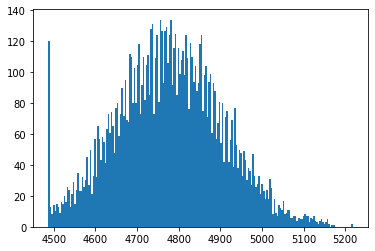

In [3]:
# Sample model
n_samples = 10000
samples = sq.sample(model, n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
plt.hist(samples, bins=200)
pprint(sq.get_percentiles(samples, digits=0))


In [4]:
print(days_left)

26


In [5]:
for target in [4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 5000]:
    print('{} - {}%'.format(target, int(sum([s >= target for s in samples]) / len(samples) * 100)))

4550 - 96%
4600 - 91%
4650 - 84%
4700 - 72%
4750 - 58%
4800 - 42%
4850 - 28%
4900 - 16%
5000 - 4%
